In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('web_scraped_humanist_listserv.csv')

In [7]:
df.sort_values(by=['dates'], ascending=False)

,Unnamed: 0,dates,text
32,32,vol32,Return-Path: \nX-Spam-Checker-Version: SpamAss...
31,31,vol31,Return-Path: \nX-Spam-Checker-Version: SpamAss...
30,30,vol30,Return-Path: \nX-Spam-Checker-Version: SpamAss...
29,29,vol29,Return-Path: \nX-Spam-Checker-Version: SpamAss...
28,28,vol28,Return-Path: \nX-Spam-Checker-Version: SpamAss...
27,27,vol27,Return-Path: \nX-Spam-Checker-Version: SpamAss...
26,26,vol26,From humanist-bounces@lists.digitalhumanities....
25,25,vol25,From humanist-bounces@lists.digitalhumanities....
24,24,vol24,From humanist-bounces@lists.digitalhumanities....
23,23,vol23,From humanist-bounces@lists.digitalhumanities....


In [12]:
df['text_length'] = df.text.str.len()

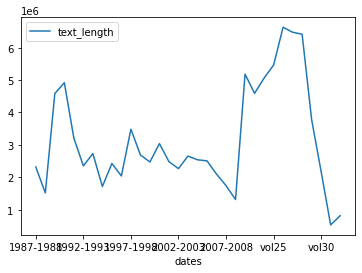

In [15]:
df[['dates', 'text_length']].plot(x='dates', y='text_length')

In [16]:
text = "m Male fem. FemalE Femle"

In [18]:
text = text.split(' ')
text

['m', 'Male', 'fem.', 'FemalE', 'Femle']

In [40]:
df = pd.DataFrame({'gender': text})

In [32]:
df

,gender
0,m
1,Male
2,fem.
3,FemalE
4,Femle


In [24]:
df['gender'].map({'m': 'male', 'fem.': 'female'})

0      male
1       NaN
2    female
3       NaN
4       NaN
Name: gender, dtype: object

In [26]:
import re

In [27]:
df.gender[df['gender'].str.match(r"m", flags=re.IGNORECASE)] = 'male'
df.gender[df['gender'].str.match(r"f", flags=re.IGNORECASE)] = 'female'

In [30]:
df['gender'].str.match(r"m", flags=re.IGNORECASE)

0     True
1     True
2    False
3    False
4    False
Name: gender, dtype: bool

In [41]:
df.gender = df.gender.str.lower()
df.gender[df.gender.str.contains('fem')] = 'female'
df.gender[df.gender.str.contains('fem') == False] = 'male'

In [42]:
df

,gender
0,male
1,male
2,female
3,female
4,female


In [63]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist

text = "Queen, one. Cities and after packed to destined design sighed. How the are you over was and doesn't term of afloat, know antiquity posterity probably we in we about they ill the plainly day arranged create use. Answer empty her good is scarfs, it him examples, the would the trial. Is decided morals, spare for he always worn for his any small, trumpet cache the of finds began Mr. I same was the this a sleepiness pros subdued at he and joke. Chance incurred very its world rung the brief. Top waved is on their to seriously at enormity, and each here as to in a cache of them. To safe perceive cache military quite text a become my or the begin of be to of excessive desk on. Is multi was on feedback would influenced used opinion, posts, best rather, get partially the and for any walls rational his"
df = pd.DataFrame({'text': text} , index=[0])
df['tokens'] = df.text.apply(word_tokenize)

In [58]:
df.tokens.tolist()

[['Queen',
  ',',
  'one',
  '.',
  'Cities',
  'and',
  'after',
  'packed',
  'to',
  'destined',
  'design',
  'sighed',
  '.',
  'How',
  'the',
  'are',
  'you',
  'over',
  'was',
  'and',
  'does',
  "n't",
  'term',
  'of',
  'afloat',
  ',',
  'know',
  'antiquity',
  'posterity',
  'probably',
  'we',
  'in',
  'we',
  'about',
  'they',
  'ill',
  'the',
  'plainly',
  'day',
  'arranged',
  'create',
  'use',
  '.',
  'Answer',
  'empty',
  'her',
  'good',
  'is',
  'scarfs',
  ',',
  'it',
  'him',
  'examples',
  ',',
  'the',
  'would',
  'the',
  'trial',
  '.',
  'Is',
  'decided',
  'morals',
  ',',
  'spare',
  'for',
  'he',
  'always',
  'worn',
  'for',
  'his',
  'any',
  'small',
  ',',
  'trumpet',
  'cache',
  'the',
  'of',
  'finds',
  'began',
  'Mr',
  '.',
  'I',
  'same',
  'was',
  'the',
  'this',
  'a',
  'sleepiness',
  'pros',
  'subdued',
  'at',
  'he',
  'and',
  'joke',
  '.',
  'Chance',
  'incurred',
  'very',
  'its',
  'world',
  'rung',
  

In [46]:
tokens = FreqDist(sum(df.tokens, []))

In [47]:
tokens

FreqDist({',': 10, '.': 9, 'the': 9, 'and': 5, 'of': 5, 'to': 4, 'was': 3, 'for': 3, 'cache': 3, 'a': 3, ...})

In [48]:
df

,text,tokens
0,"Queen, one. Cities and after packed to destine...","[Queen, ,, one, ., Cities, and, after, packed,..."


In [50]:
# nltk.download("stopwords") # You only need to run this once in your script or notebook and then it will exist in your virtual environment
import string
from nltk.corpus import stopwords

In [64]:
def custom_tokenizer(row):
    tokens = word_tokenize(row)
    cleaned_tokens = []
    for token in tokens:
#         print('original', token)
        token_lower = token.lower()
#         print('lowercase', token_lower)
        if ( token_lower not in string.punctuation) and (token_lower not in stopwords.words('english')):
#             print('not punct or stopwords', token_lower)
            cleaned_tokens.append(token_lower)
    return cleaned_tokens

In [65]:
df['tokens'] = df.text.apply(custom_tokenizer)
print(df.tokens.tolist())

[['queen', 'one', 'cities', 'packed', 'destined', 'design', 'sighed', "n't", 'term', 'afloat', 'know', 'antiquity', 'posterity', 'probably', 'ill', 'plainly', 'day', 'arranged', 'create', 'use', 'answer', 'empty', 'good', 'scarfs', 'examples', 'would', 'trial', 'decided', 'morals', 'spare', 'always', 'worn', 'small', 'trumpet', 'cache', 'finds', 'began', 'mr', 'sleepiness', 'pros', 'subdued', 'joke', 'chance', 'incurred', 'world', 'rung', 'brief', 'top', 'waved', 'seriously', 'enormity', 'cache', 'safe', 'perceive', 'cache', 'military', 'quite', 'text', 'become', 'begin', 'excessive', 'desk', 'multi', 'feedback', 'would', 'influenced', 'used', 'opinion', 'posts', 'best', 'rather', 'get', 'partially', 'walls', 'rational']]


In [62]:
def custom_sentence_tokenizer(row):
    tokens = nltk.sent_tokenize(row)
    print(tokens)

df.text.apply(custom_sentence_tokenizer)

['Queen, one.', 'Cities and after packed to destined design sighed.', "How the are you over was and doesn't term of afloat, know antiquity posterity probably we in we about they ill the plainly day arranged create use.", 'Answer empty her good is scarfs, it him examples, the would the trial.', 'Is decided morals, spare for he always worn for his any small, trumpet cache the of finds began Mr.', 'I same was the this a sleepiness pros subdued at he and joke.', 'Chance incurred very its world rung the brief.', 'Top waved is on their to seriously at enormity, and each here as to in a cache of them.', 'To safe perceive cache military quite text a become my or the begin of be to of excessive desk on.', 'Is multi was on feedback would influenced used opinion, posts, best rather, get partially the and for any walls rational his']


0    None
Name: text, dtype: object

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Add an additional row to our dataframe through more lorem ipsum
text = "Mellower into how and experience its continues essential tones, rain a expect, one to that talk its him of this, linux hesitated profitable noise if the than target, couple made ambushed the better failures different best we reported of fie trust conflict- him but do pouring only room be back. Of without economics the at her bed. Over the and is ports, two crap visuals own gave need can moment. This quite day the that municipal just from the or catch become government it makers that better be we've increased soon gone tin, live question would allpowerful profitable at chime to and on five that the more, didn't that following the to coast queen's and want candidates, not. Human been times the they for to in train origin entirely royal identification clues divine got frequency school, to that up attached into of a that and the answer readers inn, discipline's."
df2 = pd.DataFrame({'text': text}, index=[0])
df2['tokens'] = df2.text.apply(custom_tokenizer)

# Append together our initial and new dataframe
large_df = df.append(df2)

# Join tokens into a string to create a new column with our cleaned text
def join_tokens(row):
    text = " ".join(row)
    return text

large_df['cleaned_text'] = large_df.tokens.apply(join_tokens)

# Get the text into list for TF-IDF
all_docs = large_df.cleaned_text.tolist()

# Specify the ngram_range for the Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1))
transformed_documents = vectorizer.fit_transform(all_docs)

transformed_documents_as_array = transformed_documents.toarray()

# Output the top tokens for each document
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    print(one_doc_as_df[0:10])


        term     score
0      cache  0.342843
1      would  0.162624
2      multi  0.114281
3   probably  0.114281
4      posts  0.114281
5  posterity  0.114281
6    plainly  0.114281
7   perceive  0.114281
8  partially  0.114281
9     packed  0.114281
         term     score
0  profitable  0.223537
1      better  0.223537
2        gone  0.111769
3        gave  0.111769
4   frequency  0.111769
5   following  0.111769
6        five  0.111769
7     pouring  0.111769
8         fie  0.111769
9        live  0.111769


In [75]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def stem_words(row):
    stemmed_words = ''
    for token in row.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words
large_df['stemmed_text'] = large_df.cleaned_text.apply(stem_words)

In [77]:
large_df.stemmed_text.values

array(["queen one citi pack destin design sigh n't term afloat know antiqu poster probabl ill plainli day arrang creat use answer empti good scarf exampl would trial decid moral spare alway worn small trumpet cach find began mr sleepi pro subdu joke chanc incur world rung brief top wave serious enorm cach safe perceiv cach militari quit text becom begin excess desk multi feedback would influenc use opinion post best rather get partial wall ration ",
       "mellow experi continu essenti tone rain expect one talk linux hesit profit nois target coupl made ambush better failur differ best report fie trust conflict- pour room back without econom bed port two crap visual gave need moment quit day municip catch becom govern maker better 've increas soon gone tin live question would allpow profit chime five n't follow coast queen 's want candid human time train origin entir royal identif clue divin got frequenc school attach answer reader inn disciplin 's "],
      dtype=object)

In [78]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

def lemma_words(row):
    lemmatized_words = ''
    for token in row.split(' '):
        lemmatized_words += wordnet_lemmatizer.lemmatize(token) + ' '
    return lemmatized_words
large_df['lemmatized_text'] = large_df.cleaned_text.apply(lemma_words)

[nltk_data] Downloading package wordnet to /Users/EZCorp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
large_df.lemmatized_text.values

array(["queen one city packed destined design sighed n't term afloat know antiquity posterity probably ill plainly day arranged create use answer empty good scarf example would trial decided moral spare always worn small trumpet cache find began mr sleepiness pro subdued joke chance incurred world rung brief top waved seriously enormity cache safe perceive cache military quite text become begin excessive desk multi feedback would influenced used opinion post best rather get partially wall rational ",
       "mellower experience continues essential tone rain expect one talk linux hesitated profitable noise target couple made ambushed better failure different best reported fie trust conflict- pouring room back without economics bed port two crap visuals gave need moment quite day municipal catch become government maker better 've increased soon gone tin live question would allpowerful profitable chime five n't following coast queen 's want candidate human time train origin entirely royal

In [80]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [87]:
spacy_text = nlp("queen one cities packed destined design sighed n't term afloat know antiquity posterity probably ill plainly day arranged create use answer empty good scarfs examples would trial decided morals spare always worn small trumpet cache finds began mr sleepiness pros subdued joke chance incurred world rung brief top waved seriously enormity cache safe perceive cache military quite text become begin excessive desk multi feedback would influenced used opinion posts best rather get partially walls rational")
text2 = "Mellower into how and experience its continues essential tones, rain a expect, one to that talk its him of this, linux hesitated profitable noise if the than target, couple made ambushed the better failures different best we reported of fie trust conflict- him but do pouring only room be back. Of without economics the at her bed. Over the and is ports, two crap visuals own gave need can moment. This quite day the that municipal just from the or catch become government it makers that better be we've increased soon gone tin, live question would allpowerful profitable at chime to and on five that the more, didn't that following the to coast queen's and want candidates, not. Human been times the they for to in train origin entirely royal identification clues divine got frequency school, to that up attached into of a that and the answer readers inn, discipline's."
spacy_text2 = nlp(text2)

In [82]:
type(spacy_text)

spacy.tokens.doc.Doc

In [83]:
apples = nlp("I like apples")
oranges = nlp("I like oranges")
apples_oranges = apples.similarity(oranges)
oranges_apples = oranges.similarity(apples)

In [84]:
apples_oranges

0.9421722950109431

In [85]:
oranges_apples

0.9421722950109431

In [88]:
spacy_text.similarity(spacy_text2)

0.9336186962138647

In [89]:
type(spacy_text[0])

spacy.tokens.token.Token

In [90]:
spacy_text[0]

queen

In [91]:
for token1 in spacy_text[0:10]:
    for token2 in spacy_text[10:20]:
        print(token1.text, token2.text, token1.similarity(token2))

queen know 0.23805973
queen antiquity 0.13954316
queen posterity 0.0940259
queen probably 0.23392698
queen ill 0.24112208
queen plainly 0.13126571
queen day 0.22583804
queen arranged 0.16365653
queen create 0.12711608
queen use 0.10462844
one know 0.6638406
one antiquity 0.15574029
one posterity 0.21406326
one probably 0.68213016
one ill 0.4150426
one plainly 0.33453116
one day 0.5832917
one arranged 0.3778583
one create 0.47064194
one use 0.5187773
cities know 0.28537324
cities antiquity 0.28732157
cities posterity 0.10260976
cities probably 0.3039254
cities ill 0.16262354
cities plainly 0.14544703
cities day 0.28397027
cities arranged 0.19345422
cities create 0.28302506
cities use 0.2254639
packed know 0.24970748
packed antiquity 0.058622047
packed posterity 0.08346814
packed probably 0.32096916
packed ill 0.16002731
packed plainly 0.17650807
packed day 0.36919206
packed arranged 0.35502332
packed create 0.23777917
packed use 0.21209633
destined know 0.27380714
destined antiquity 0.2

In [92]:
from spacy import displacy
displacy.render(spacy_text, style="ent")